In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Libraries

In [2]:
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Advanced plotting
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # Evaluation metrics
from sklearn.model_selection import GridSearchCV, cross_validate  # Hyperparameter tuning & cross-validation
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.preprocessing import LabelEncoder  # Label encoding
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.preprocessing import StandardScaler  # Feature scaling
import warnings  # Manage warnings
warnings.simplefilter(action="ignore")  # Ignore warnings

In [3]:
#Loading the dataset
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

# Exploratory Data Analysis (EDA)

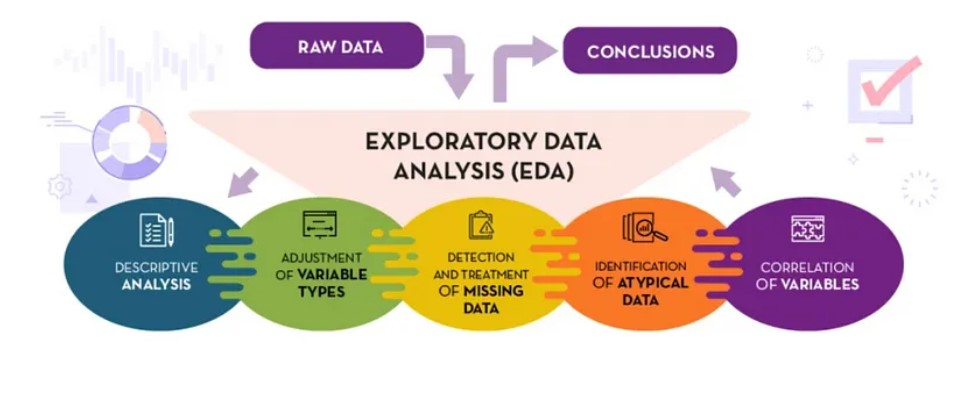

**Exploratory Data Analysis (EDA)** is a process used to analyze and summarize the main characteristics of a dataset, usually with visual methods, before applying complex models.

**Key Steps in EDA**:
1. **Data Cleaning**: Handling missing values, errors, and duplicates.
2. **Descriptive Statistics**: Using measures like mean, median, and standard deviation to understand data distribution.
3. **Data Visualization**: Creating plots (e.g., histograms, boxplots, scatter plots) to visually explore the data.
4. **Correlation Analysis**: Checking relationships between variables using correlation coefficients.
5. **Outlier Detection**: Identifying unusual data points that may affect analysis.
6. **Feature Engineering**: Creating new features to improve analysis

**Goals of EDA:**
- Understand the data: Discover patterns and distributions.
- Identify outliers: Find unusual data points.
- Test assumptions: Ensure data meets the assumptions needed for modeling.
- Generate hypotheses: Identify relationships for further analysis.
EDA is crucial for getting a good understanding of the data before moving to more advanced analysis.

In [4]:
#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape # Shape

(768, 9)

In [6]:
df.dtypes # Types

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.head(5) # Head

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail(5) # Tail

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
df.isnull().sum() # NA

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T # Quantiles

,0.00,0.05,0.50,0.95,0.99,1.00
Pregnancies,0.000,0.00000,3.0000,10.00000,13.00000,17.00
Glucose,0.000,79.00000,117.0000,181.00000,196.00000,199.00
BloodPressure,0.000,38.70000,72.0000,90.00000,106.00000,122.00
SkinThickness,0.000,0.00000,23.0000,44.00000,51.33000,99.00
Insulin,0.000,0.00000,30.5000,293.00000,519.90000,846.00
BMI,0.000,21.80000,32.0000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,0.078,0.14035,0.3725,1.13285,1.69833,2.42
Age,21.000,21.00000,29.0000,58.00000,67.00000,81.00
Outcome,0.000,0.00000,0.0000,1.00000,1.00000,1.00


Quantiles are values that divide a dataset into specific proportions and are commonly used to understand the distribution of the data.

**Common Types:**
1. **Median (50th percentile)**: The middle value that divides the dataset into two equal parts.
2. **Quartiles**:

- *Q1 (1st Quartile)*: The value below which 25% of the data falls.
- *Q2 (2nd Quartile)*: The median (50th percentile).
- *Q3 (3rd Quartile)*: The value below which 75% of the data falls.
3. **Percentiles**: Divide the data into 100 equal parts, with each percentile representing a specific percentage.

**Applications**:
- **Data Distribution**: Helps understand how data is spread.
- **Boxplot**: A visualization used to summarize the data.
- **Machine Learning**: Used to split data and create threshold values.
- **Outlier Detection**: Identifies extreme values outside the expected range.

**Quantiles** are an important tool for summarizing, understanding, and analyzing the distribution of data.

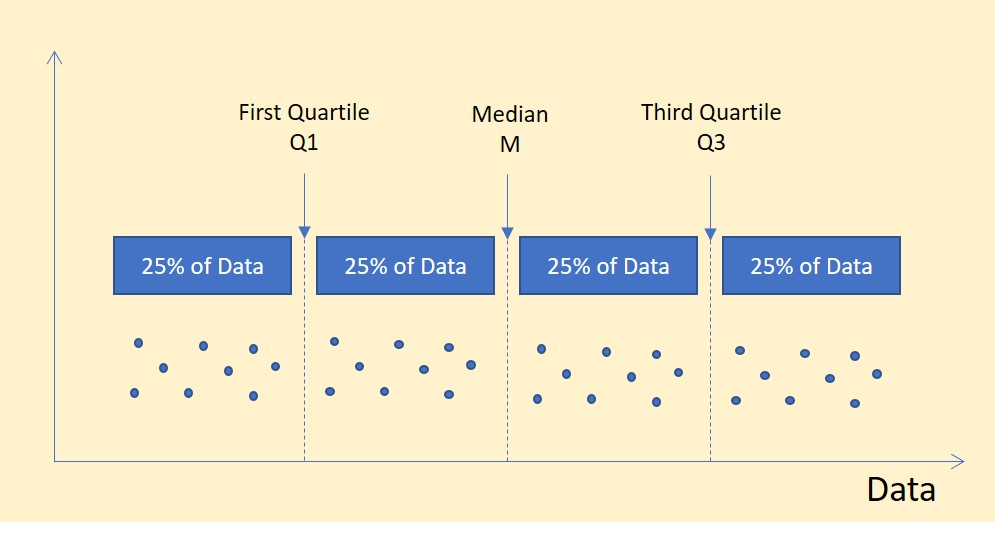

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Numerical and Categorical Variables Detection

In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numerical, and categorical but cardinal variables in the dataset.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which the variable names are to be extracted
        cat_th: int, optional
                Threshold for classifying numerical variables as categorical
        car_th: int, optional
                Threshold for classifying categorical variables as cardinal

    Returns
    ------
        cat_cols: list
                List of categorical variables
        num_cols: list
                List of numerical variables
        cat_but_car: list
                List of categorical-like cardinal variables
    """
    # Identify categorical variables (string type)
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # Identify numerical variables with fewer unique values, treated as categorical
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    
    # Identify categorical variables with many unique values (cardinal variables)
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    
    # Combine categorical variables and exclude cardinal ones
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Identify numerical variables and exclude those treated as categorical
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Display dataset overview
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [13]:
# Get the names of categorical, numerical, and cardinal categorical variables from the dataframe
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [14]:
cat_cols

['Outcome']

In [15]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [16]:
cat_but_car

[]

## Analysis of Categorical Variables

In [17]:
def cat_summary(dataframe, col_name, plot=False):
    # Print the value counts and their percentage ratio for the specified categorical column
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    
    # If plot=True, display a count plot (bar plot) of the categorical column values
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

# Example usage: calling the function to analyze the "Outcome" column of the dataframe "df"
cat_summary(df, "Outcome")

         Outcome      Ratio
Outcome                    
0            500  65.104167
1            268  34.895833


## Analysis of Numerical Variables

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
max       17.000000
Name: Pregnancies, dtype: float64


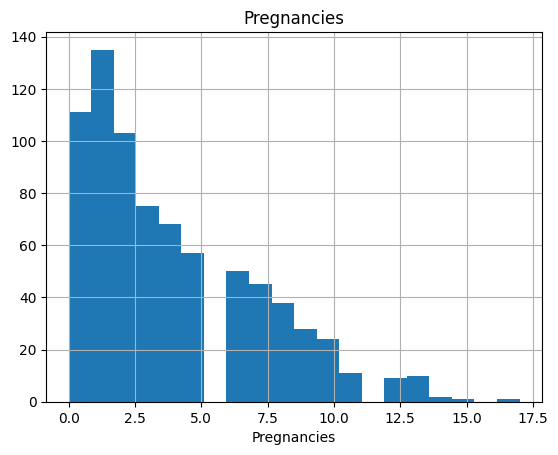

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
5%        79.000000
10%       85.000000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      134.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
max      199.000000
Name: Glucose, dtype: float64


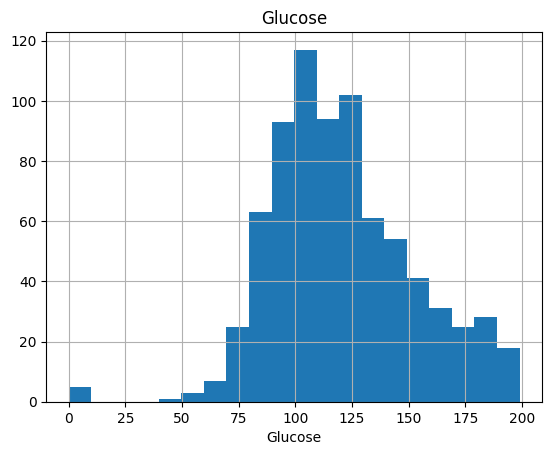

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
5%        38.700000
10%       54.000000
20%       60.000000
30%       64.000000
40%       68.000000
50%       72.000000
60%       74.000000
70%       78.000000
80%       82.000000
90%       88.000000
95%       90.000000
99%      106.000000
max      122.000000
Name: BloodPressure, dtype: float64


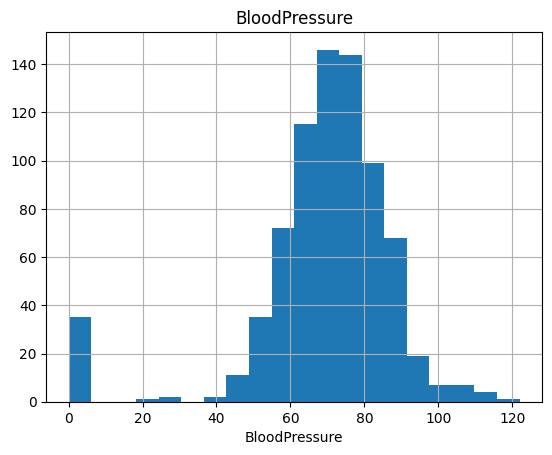

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        8.200000
40%       18.000000
50%       23.000000
60%       27.000000
70%       31.000000
80%       35.000000
90%       40.000000
95%       44.000000
99%       51.330000
max       99.000000
Name: SkinThickness, dtype: float64


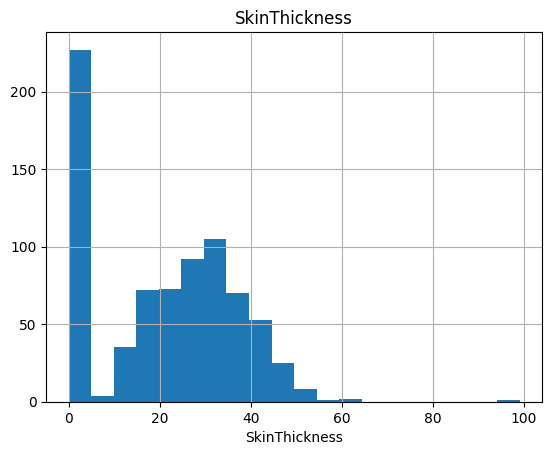

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%       30.500000
60%       72.200000
70%      106.000000
80%      150.000000
90%      210.000000
95%      293.000000
99%      519.900000
max      846.000000
Name: Insulin, dtype: float64


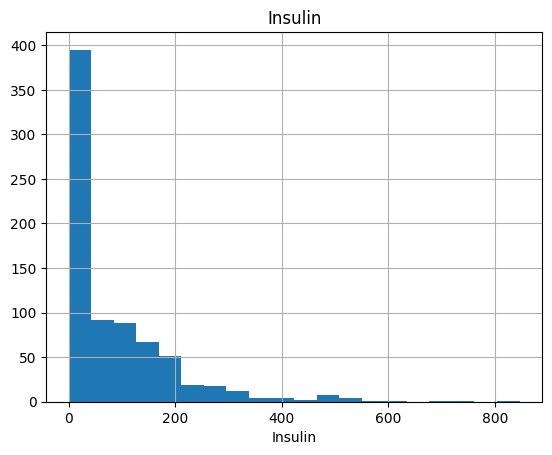

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
5%        21.800000
10%       23.600000
20%       25.900000
30%       28.200000
40%       30.100000
50%       32.000000
60%       33.700000
70%       35.490000
80%       37.800000
90%       41.500000
95%       44.395000
99%       50.759000
max       67.100000
Name: BMI, dtype: float64


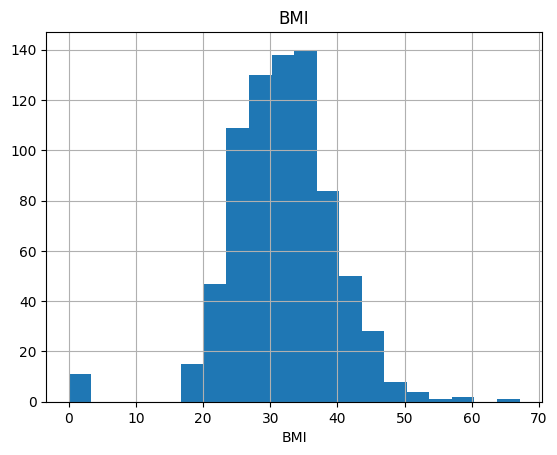

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
5%         0.140350
10%        0.165000
20%        0.219400
30%        0.259000
40%        0.302800
50%        0.372500
60%        0.454200
70%        0.563700
80%        0.687000
90%        0.878600
95%        1.132850
99%        1.698330
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


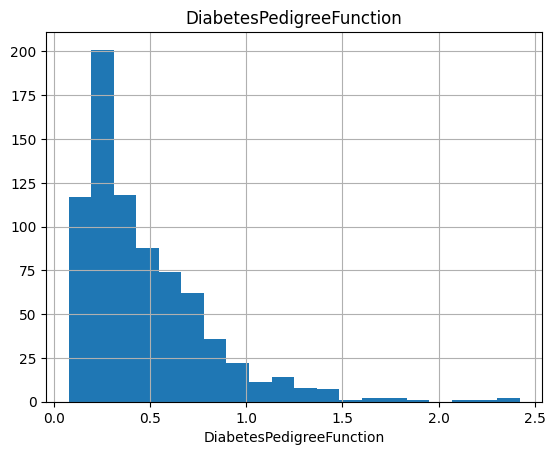

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
5%        21.000000
10%       22.000000
20%       23.000000
30%       25.000000
40%       27.000000
50%       29.000000
60%       33.000000
70%       38.000000
80%       42.600000
90%       51.000000
95%       58.000000
99%       67.000000
max       81.000000
Name: Age, dtype: float64


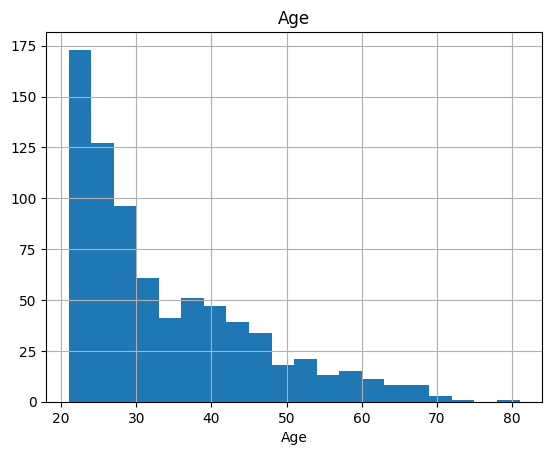

In [18]:
def num_summary(dataframe, numerical_col, plot=False):
    # Define the quantiles to display in the summary (from 5% to 99%)
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    
    # Print descriptive statistics for the specified numerical column including the specified quantiles
    print(dataframe[numerical_col].describe(quantiles).T)

    # If plot=True, plot a histogram for the numerical column to visualize its distribution
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)  # Set the x-axis label
        plt.title(numerical_col)   # Set the title of the plot
        plt.show()  # Display the plot

# Example usage: Loop through all numerical columns and generate the summary and plot
for col in num_cols:
    num_summary(df, col, plot=True)

## Analysis of Numerical Variables by Target

In [19]:
def target_summary_with_num(dataframe, target, numerical_col):
    # Group the dataframe by the target variable and calculate the mean of the numerical column for each target group
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

# Example usage: Loop through all numerical columns and calculate the mean of each numerical column for each "Outcome" group
for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672


            Glucose
Outcome            
0        109.980000
1        141.257463


         BloodPressure
Outcome               
0            68.184000
1            70.824627


         SkinThickness
Outcome               
0            19.664000
1            22.164179


            Insulin
Outcome            
0         68.792000
1        100.335821


               BMI
Outcome           
0        30.304200
1        35.142537


         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500


               Age
Outcome           
0        31.190000
1        37.067164




## Correlation

**Correlation** is a measure of the relationship between two or more variables, showing how they move together. It is quantified using a **correlation coefficient** (usually denoted as **r**), which ranges from **-1** to **+1**:

- **+1**: Perfect positive correlation (both variables increase together).
- **-1**: Perfect negative correlation (one variable increases while the other decreases).
- **0**: No correlation (no relationship between the variables).


In summary:
- **Positive correlation** means both variables increase or decrease together.
- **Negative correlation** means one variable increases while the other decreases.
- **No correlation** means there is no clear relationship between the variables.
Correlation is commonly used to understand how variables are related in datasets, and can be visualized using scatter plots or heatmaps.

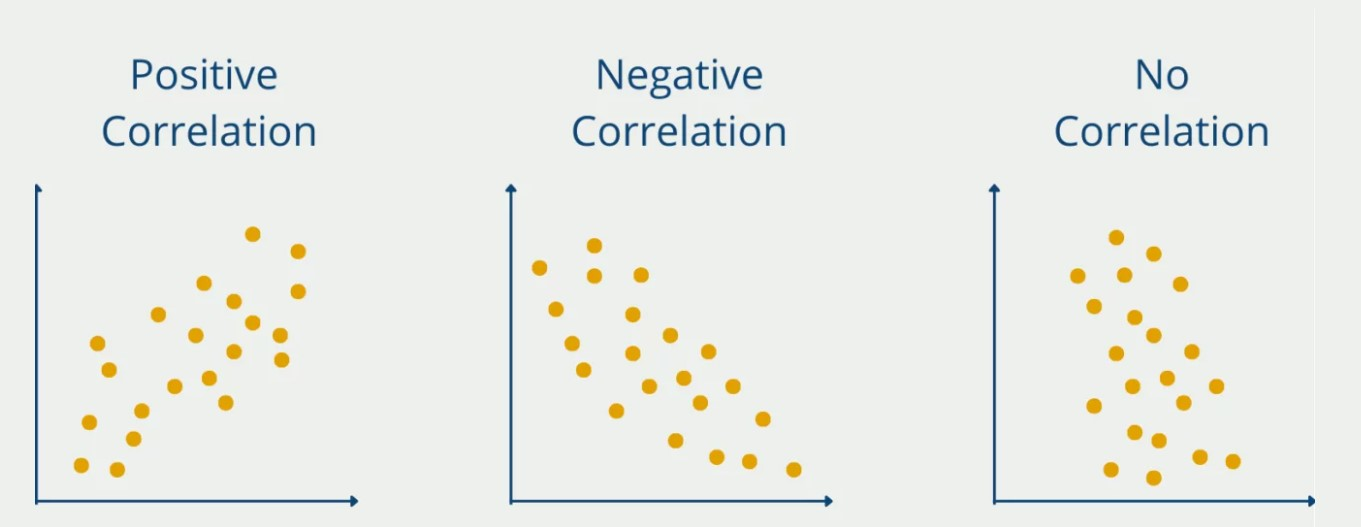

In [20]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


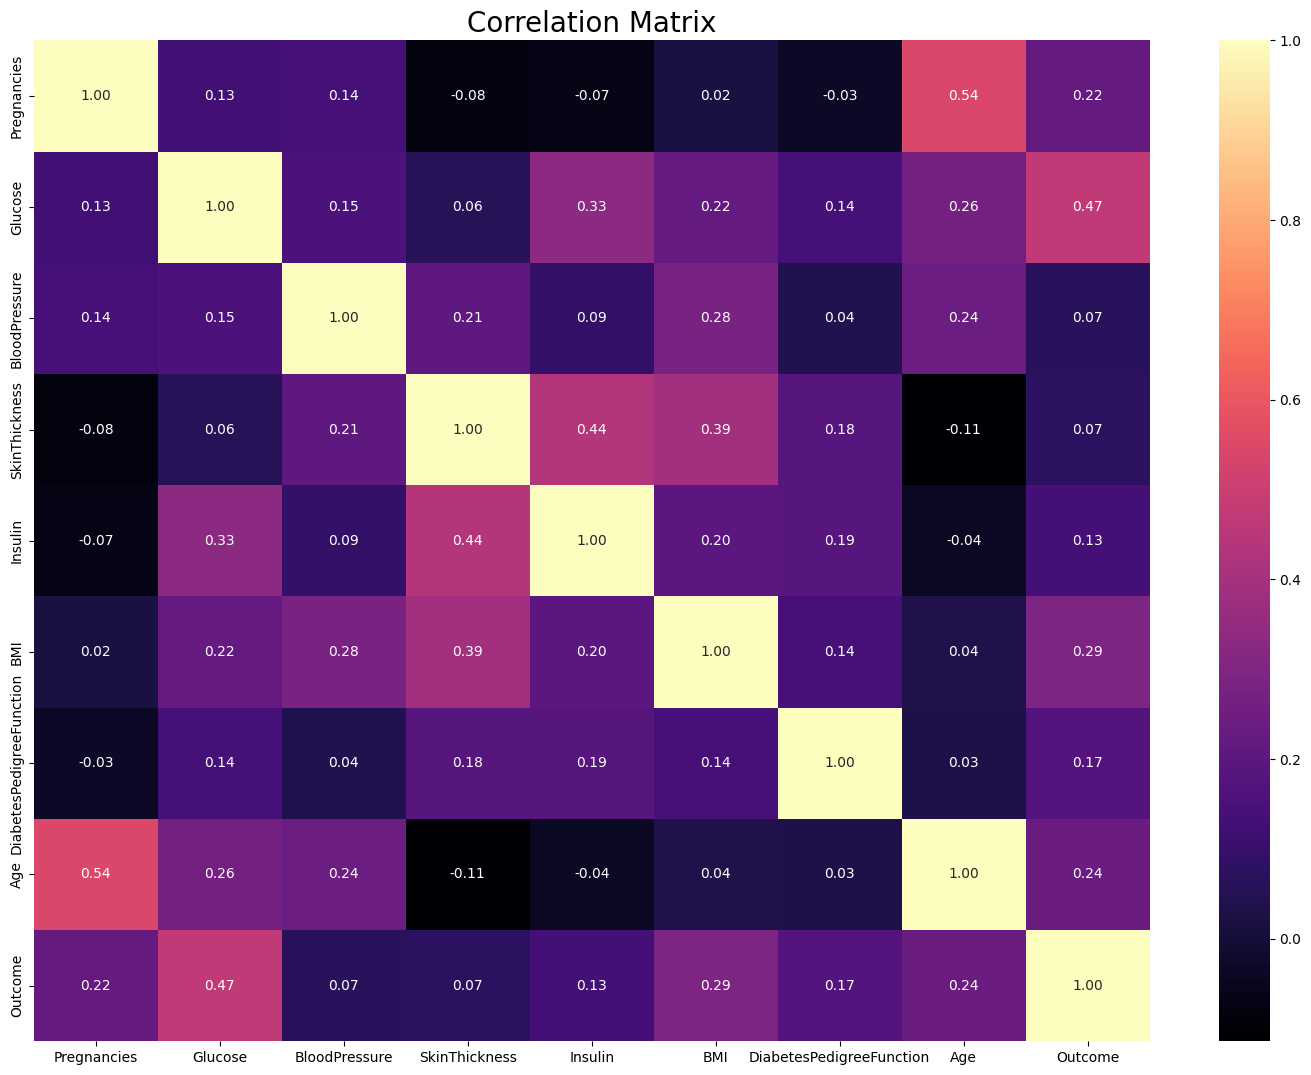

In [21]:
# Correlation Matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

A **correlation matrix** is a table that shows the correlation coefficients between multiple variables in a dataset. It helps to identify how strongly pairs of variables are related. The values range from **-1** (perfect negative correlation) to **+1** (perfect positive correlation), with 0 meaning no correlation. It is often used in data analysis to understand relationships between variables and is commonly visualized using a **heatmap**.

## Building the Base Model

In [22]:
y = df["Outcome"]  # Dependent variable (target variable)
X = df.drop("Outcome", axis=1)  # Independent variables (features), dropping the "Outcome" column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [23]:
# Train a Random Forest Classifier model on the training data
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Predict the target variable using the trained model on the test data
y_pred = rf_model.predict(X_test)

**RandomForestClassifier** is a machine learning algorithm in the **scikit-learn** library used for classification tasks. It is an **ensemble method** that builds multiple decision trees and combines their results to improve accuracy and robustness.

**Key Features:**
1. **Multiple Decision Trees**: Random Forest creates many decision trees, each trained on a random subset of the data.
2. **Voting Mechanism**: Each tree makes a prediction, and the majority vote determines the final output.
3. **Random Feature Selection**: For each split, only a random subset of features is considered, increasing model diversity.
4. **Resistant to Overfitting**: By combining multiple trees, it reduces the risk of overfitting compared to a single decision tree.

**Advantages:**
- **High accuracy** and generalizes well.
- **Resistant to overfitting**.
- **Easy to use** and does not require heavy data preprocessing.
  
**Use Cases:**
Classification and regression problems, particularly when dealing with complex or large datasets.

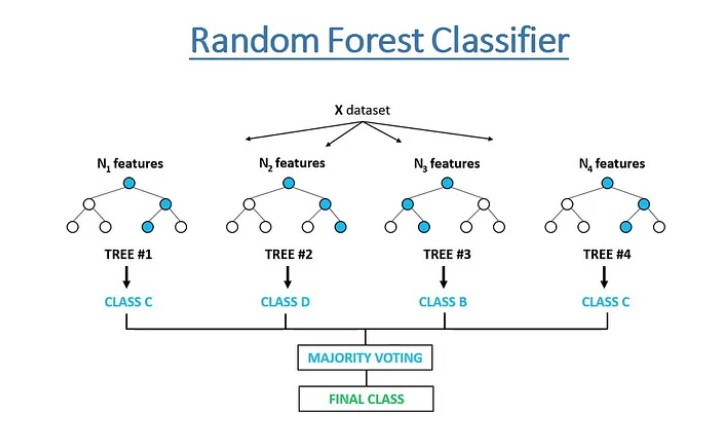

In [24]:
# Model evaluation metrics
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred, y_test), 3)}")
print(f"Precision: {round(precision_score(y_pred, y_test), 2)}")
print(f"F1: {round(f1_score(y_pred, y_test), 2)}")
print(f"AUC: {round(roc_auc_score(y_pred, y_test), 2)}")

Accuracy: 0.77
Recall: 0.706
Precision: 0.59
F1: 0.64
AUC: 0.75


**Model evaluation metrics** are quantitative measures used to assess the performance of a machine learning model. These metrics help to determine how well the model makes predictions and whether it meets the specific objectives of the task, such as classification, regression, or others. The choice of evaluation metric depends on the type of problem (e.g., classification or regression) and the business objectives.

#### Common Evaluation Metrics for Classification Models:
1. **Accuracy:**
- It measures the proportion of correct predictions (both true positives and true negatives) out of all predictions.
- Best used when the class distribution is balanced.
- Formula:
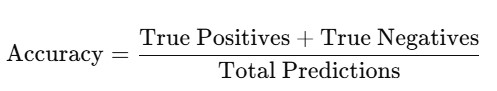

2. **Recall (Sensitivity or True Positive Rate):**
- It measures the proportion of actual positive cases that were correctly identified by the model.
- Useful when the cost of missing a positive class (false negative) is high.
- Formula:
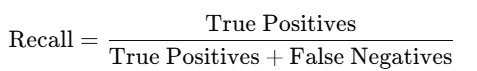

3. Precision:
- It measures the proportion of predicted positive cases that were actually positive.
- Important when the cost of a false positive is high (e.g., predicting a disease when there is none).
- Formula:
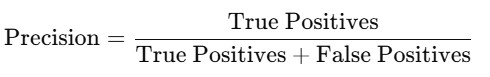

4. **F1 Score:**
- The harmonic mean of **Precision** and **Recall**, providing a balance between the two metrics.
- Useful when you need a balance between Precision and Recall, especially when there is an uneven class distribution.
- Formula:
  
   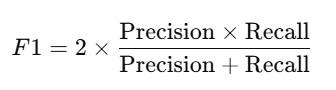

5. **AUC (Area Under the Curve):**
- It is the area under the **Receiver Operating Characteristic (ROC)** curve, which plots the true positive rate against the false positive rate.
- AUC provides an aggregate measure of performance across all classification thresholds, showing how well the model can distinguish between classes.
- A value closer to 1 indicates a better model performance.

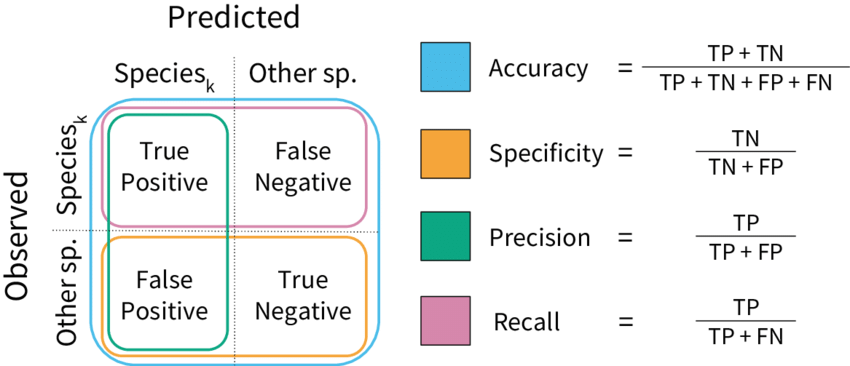

**Why are Model Evaluation Metrics Important?**
- **Assessing Model Performance**: Metrics help you evaluate how well the model performs and if it is achieving the desired outcomes.
- **Comparing Models**: They allow you to compare different models objectively.
- **Improving the Model**: Evaluation metrics help in fine-tuning the model, understanding where it is making mistakes, and improving its performance.

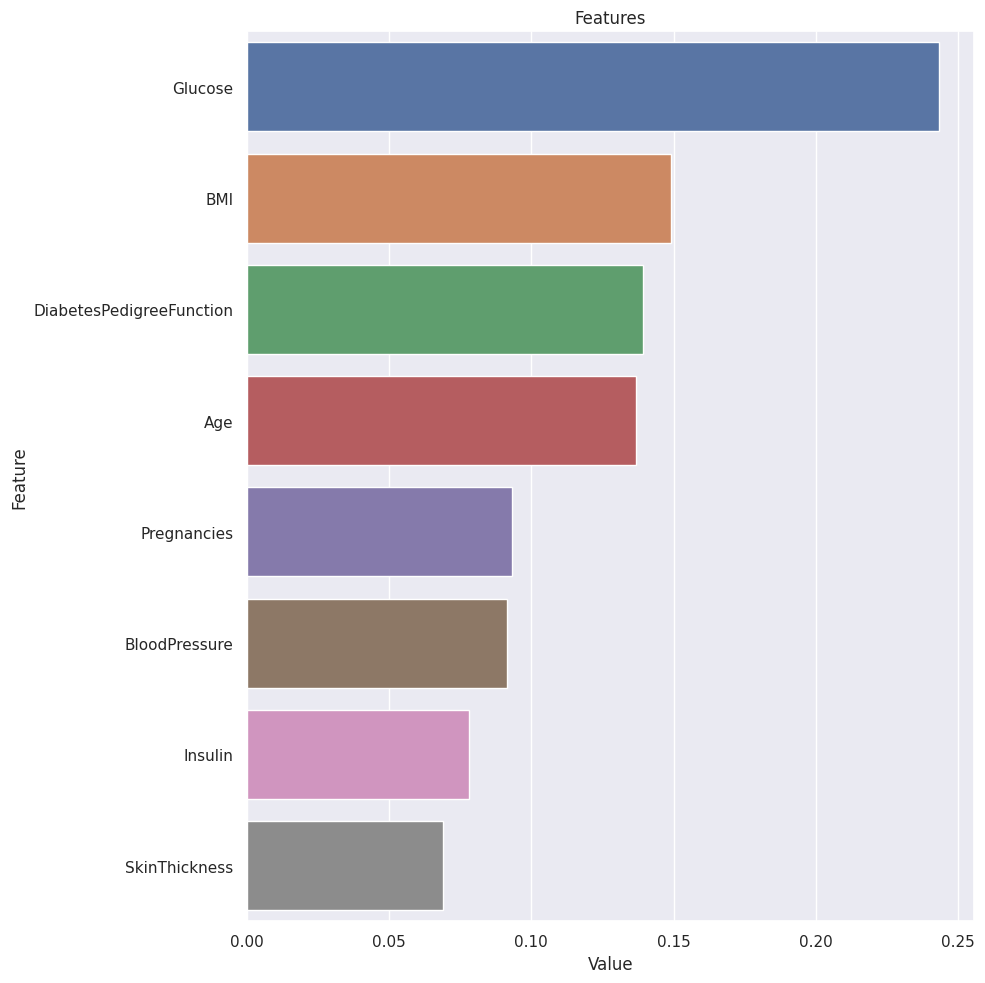

In [25]:
def plot_importance(model, features, num=len(X), save=False):
    # Create DataFrame of feature importances
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    
    # Plot top 'num' important features
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    
    # Save plot if requested
    if save:
        plt.savefig('importances.png')

# Call the function to plot feature importances
plot_importance(rf_model, X)

**What does the function do?**
- It visualizes the relative importance of each feature in the model, which helps in understanding which features are contributing most to the model's predictions.

# FEATURE ENGINEERING

**Feature engineering** is the process of using domain knowledge to select, modify, or create new features (variables or columns) from raw data in order to improve the performance of machine learning models. It involves transforming raw data into formats that are more suitable for machine learning algorithms.

Some common feature engineering techniques include:

1. **Handling missing values**: Filling in missing data with appropriate values or removing rows/columns with missing values.
2. **Encoding categorical variables**: Converting categorical data into numerical formats (e.g., using one-hot encoding or label encoding).
3. **Feature scaling**: Normalizing or standardizing numerical features so that they have similar scales.
4. **Creating new features**: Combining existing features to create new, potentially more informative features (e.g., creating an "age group" feature from an "age" feature).
5.**Dimensionality reduction**: Reducing the number of features to avoid overfitting or improve model efficiency (e.g., using PCA).
6. **Binning**: Grouping continuous variables into bins (e.g., turning ages into age groups).
7. **Feature extraction**: Extracting features from unstructured data (like text, images, or time series) to use in machine learning models.
Effective feature engineering is crucial because it can significantly impact model performance and prediction accuracy.

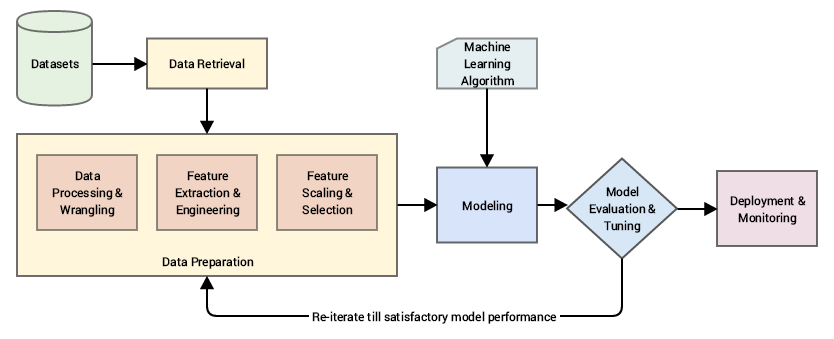

## Missing Data Analysis

In [26]:
# Identify columns with a minimum value of 0, excluding "Pregnancies" and "Outcome"
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]

In [27]:
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [28]:
# Loop through each column in zero_columns that has a minimum value of 0
for col in zero_columns:
    # Replace any 0 value in the column with NaN
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [29]:
# Missing Data Analysis
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [30]:
def missing_values_table(dataframe, na_name=False):
    # Identify columns that have missing (null) values
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    
    # Count the number of missing values in each column
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    
    # Calculate the percentage of missing values in each column
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    # Combine the missing value counts and their corresponding percentages into a DataFrame
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    
    # Print the summary of missing values for each column
    print(missing_df, end="\n")
    
    # If na_name is True, return the list of columns with missing values
    if na_name:
        return na_columns

# Call the function and store the result in na_columns
na_columns = missing_values_table(df, na_name=True)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


**What the Code Does:**

This function is used to analyze the missing values in a DataFrame. It identifies the columns that have missing values, counts the number of missing values in each column, calculates the percentage of missing values, and prints a summary of these results. If the na_name argument is set to True, it also returns a list of column names that contain missing values.

In short, this function provides a detailed analysis of missing data within a DataFrame, including both counts and percentages of missing values.

In [31]:
# Examining the relationship between missing values and the dependent variable (target)
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()  # Create a copy of the dataframe to avoid modifying the original one
    for col in na_columns:  # Loop through columns with missing values
        # Create a new flag column that indicates if the value is missing (1 if missing, 0 if not)
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    
    # Identify the newly created flag columns (those with '_NA_' in their names)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    
    # Loop through each flag column to examine the relationship with the target variable
    for col in na_flags:
        # For each flag column, calculate the mean of the target variable and the count of each group
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

# Call the function to examine the relationship between missing values and the target variable
missing_vs_target(df, "Outcome", na_columns)


                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                   0.348624    763
1                   0.400000      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                         0.343793    733
1                         0.457143     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                         0.332717    541
1                         0.387665    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                   0.329949    394
1                   0.368984    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0               0.351387    757
1               0.181818     11




**What the Code Does:**

This function is used to examine the relationship between missing values in the columns and the dependent variable (target), which is typically used to check whether missing data is associated with the target variable in some way. 

In [32]:
# Filling Missing Values (NaN) with the Median of the Corresponding Column
for col in zero_columns:  # Iterate through each column in the 'zero_columns' list
    # Replace NaN values in the column with the median value of that column
    df.loc[df[col].isnull(), col] = df[col].median()  # Use median to fill NaN values

This code fills the missing (NaN) values in the dataset with the median value of each column.

**Step-by-Step Explanation:**
1. **Select Columns with Missing Values**: It checks each column in the zero_columns list for missing values (NaN).

2. **Replace NaN with Median**: For each column, missing (NaN) values are replaced with the median of that column.

    - **Why Median?**: The median is less affected by outliers, making it a safer choice.

In summary, this code fills missing values in the dataset with the median values of the respective columns, thus handling the gaps in the data.

In [33]:
# Count missing values in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Outlier Analysis

In [34]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)  # First quartile value
    quartile3 = dataframe[col_name].quantile(q3)  # Third quartile value
    interquantile_range = quartile3 - quartile1  # Interquartile range (IQR)
    up_limit = quartile3 + 1.5 * interquantile_range  # Upper limit
    low_limit = quartile1 - 1.5 * interquantile_range  # Lower limit
    return low_limit, up_limit  # Return the lower and upper limits

IQR stands for Interquartile Range. It is a statistical measure of the spread of data, representing the range between the first quartile (Q1) and the third quartile (Q3) of a dataset. The IQR is calculated as the difference between Q3 and Q1.

It measures the middle 50% of the data and is used to identify outliers. Values that fall below Q1 minus 1.5 times the IQR or above Q3 plus 1.5 times the IQR are typically considered outliers.

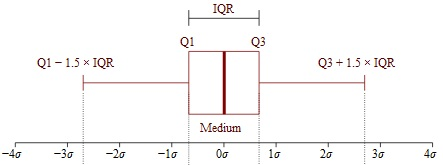

In [35]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)  # Get the outlier thresholds
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):  # Check if any value is outside the limits
        return True  # Return True if outliers are found
    else:
        return False  # Return False if no outliers are found

In [36]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)  # Get the outlier thresholds
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit  # Replace values below low limit with low limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit  # Replace values above up limit with up limit

In [37]:
# Outlier Analysis and Capping Process
for col in df.columns:
    print(col, check_outlier(df, col))  # Check if the column contains outliers
    if check_outlier(df, col):  # If outliers exist in the column
        replace_with_thresholds(df, col)  # Apply capping to outliers

Pregnancies False
Glucose False
BloodPressure False
SkinThickness True
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


In [38]:
# Check for outliers in each column of the DataFrame
for col in df.columns:
    print(col, check_outlier(df, col))  # Print the column name and whether it contains outliers

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


## Feature Extraction

In [39]:
# Creating a new age category feature by binning the "Age" variable
df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"  # Assign "mature" to ages between 21 and 49
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "senior"  # Assign "senior" to ages 50 and above

In [40]:
# Categorizing BMI values into four categories: Underweight, Healthy, Overweight, and Obese
df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], 
                       labels=["Underweight", "Healthy", "Overweight", "Obese"])  # Assign labels based on BMI ranges

In [41]:
# Converting Glucose values into categorical variable based on thresholds
df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 300], 
                           labels=["Normal", "Prediabetes", "Diabetes"])  # Categorize based on glucose levels

In [42]:
# Creating a categorical variable based on both Age and BMI, generating 3 groups
df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"  # Underweight and mature (21-49)
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"  # Underweight and senior (50+)
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"  # Healthy and mature (21-49)
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"  # Healthy and senior (50+)
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"  # Overweight and mature (21-49)
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"  # Overweight and senior (50+)
df.loc[(df["BMI"] > 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"  # Obese and mature (21-49)
df.loc[(df["BMI"] > 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"  # Obese and senior (50+)

In [43]:
# Creating a categorical variable considering both Age and Glucose values
df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"  # Low glucose and mature (21-49)
df.loc[(df["Glucose"] < 70) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"  # Low glucose and senior (50+)
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"  # Normal glucose and mature (21-49)
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"  # Normal glucose and senior (50+)
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"  # High normal glucose (pre-diabetes) and mature (21-49)
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"  # High normal glucose (pre-diabetes) and senior (50+)
df.loc[(df["Glucose"] > 125) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"  # High glucose and mature (21-49)
df.loc[(df["Glucose"] > 125) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"  # High glucose and senior (50+)

In [44]:
# Creating a categorical variable based on Insulin value
def set_insulin(dataframe, col_name="Insulin"):
    # If insulin value is between 16 and 166 (inclusive), classify it as "Normal"
    if 16 <= dataframe[col_name] <= 166:
        return "Normal"
    else:
        # If insulin value is outside this range, classify it as "Abnormal"
        return "Abnormal"

In [45]:
# Applying the 'set_insulin' function to create a new column 'NEW_INSULIN_SCORE'
df["NEW_INSULIN_SCORE"] = df.apply(set_insulin, axis=1)

In [46]:
# Creating a new feature by multiplying the 'Glucose' and 'Insulin' columns
df["NEW_GLUCOSE*INSULIN"] = df["Glucose"] * df["Insulin"]

In [47]:
# Create a new feature by multiplying Glucose and Pregnancies
df["NEW_GLUCOSE*PREGNANCIES"] = df["Glucose"] * df["Pregnancies"]
# Alternative approach to create a new feature by multiplying Glucose and (1 + Pregnancies)
# df["NEW_GLUCOSE*PREGNANCIES"] = df["Glucose"] * (1+ df["Pregnancies"])


In [48]:
# Convert all column names to uppercase
df.columns = [col.upper() for col in df.columns]

In [49]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,senior,Obese,Prediabetes,obesesenior,highsenior,Normal,18500.0,888.0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,mature,Overweight,Normal,obesemature,normalmature,Normal,10625.0,85.0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,mature,Healthy,Prediabetes,obesemature,highmature,Normal,22875.0,1464.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,mature,Overweight,Normal,obesemature,normalmature,Normal,8366.0,89.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,mature,Obese,Normal,obesemature,highmature,Abnormal,23016.0,0.0


In [50]:
df.shape

(768, 17)

## ENCODING

In [51]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 17
cat_cols: 7
num_cols: 10
cat_but_car: 0
num_but_cat: 3


In [52]:
# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

**Label Encoding** is a technique used to convert categorical data into numerical values by assigning a unique number to each category.

**For example**:

- Categorical data: ['Red', 'Green', 'Blue']
- Label Encoding: Red = 0, Green = 1, Blue = 2

**When to Use**:
- It's useful for **ordinal** categories (where there's a meaningful order), like ['Small', 'Medium', 'Large'].
When Not to Use:
It should not be used for **nominal** categories (no inherent order), like ['Red', 'Green', 'Blue']. In such cases, **One-Hot Encoding** is a better choice.

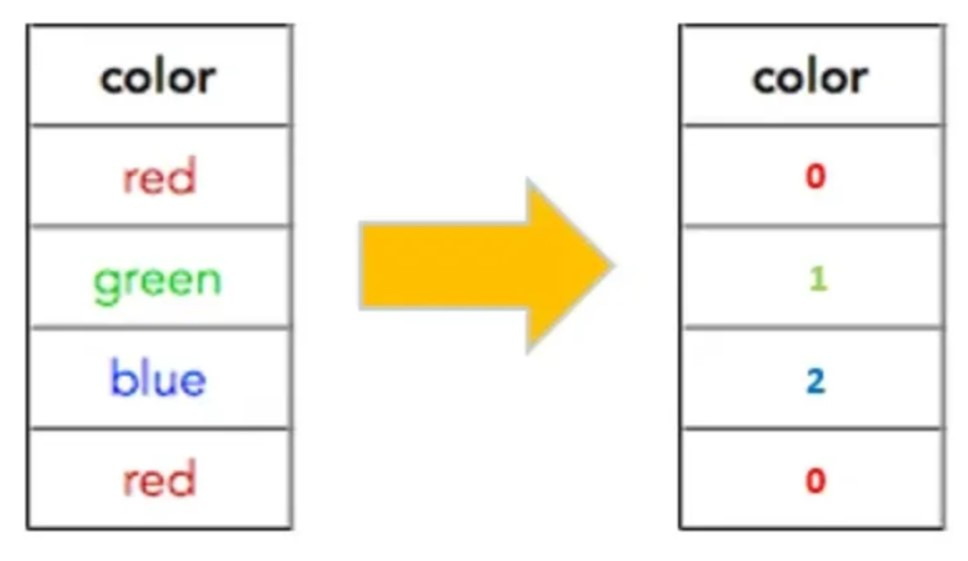

In [53]:
# Identify categorical columns with exactly 2 unique values (binary columns)
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['NEW_AGE_CAT', 'NEW_INSULIN_SCORE']

In [54]:
# Apply label encoding to each binary column
for col in binary_cols:
    df = label_encoder(df, col)

In [55]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,Obese,Prediabetes,obesesenior,highsenior,1,18500.0,888.0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,Overweight,Normal,obesemature,normalmature,1,10625.0,85.0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,Healthy,Prediabetes,obesemature,highmature,1,22875.0,1464.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,Overweight,Normal,obesemature,normalmature,1,8366.0,89.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,Obese,Normal,obesemature,highmature,0,23016.0,0.0


In [56]:
# One-Hot Encoding
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]
cat_cols

['NEW_AGE_BMI_NOM', 'NEW_AGE_GLUCOSE_NOM', 'NEW_BMI', 'NEW_GLUCOSE']


**One-Hot Encoding** is a technique used to convert categorical variables into binary columns, where each category is represented by a separate column with values of 0 or 1. It is mainly used for nominal data (categories with no inherent order).

**Key Points**:
- For each unique category, a new binary column is created.
- Each row gets a 1 in the column for its category and 0 in others.
- It avoids introducing any ordinal relationship among categories.

**Example**: If you have a Color feature with values ['Red', 'Green', 'Blue'], One-Hot Encoding will create three new columns: Color_Red, Color_Green, and Color_Blue, with 1 or 0 values depending on the category.

It's suitable for categorical data with no meaningful order between the categories.

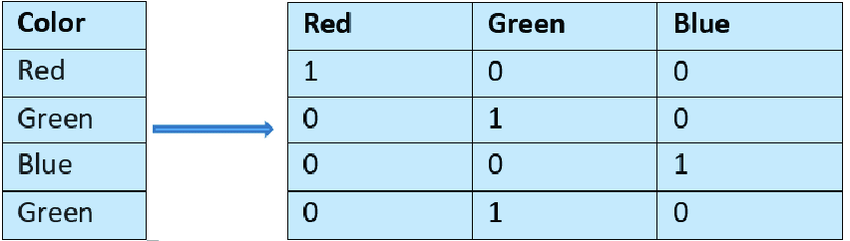

In [57]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [58]:
# Display the shape of the dataframe
df.shape  

(768, 27)

In [59]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,...,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,...,True,False,False,False,False,False,False,True,True,False
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,...,False,False,False,True,False,False,True,False,False,False
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,...,False,False,False,False,False,True,False,False,True,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,...,False,False,False,True,False,False,True,False,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,...,False,False,False,False,False,False,False,True,False,False


## Feature Standardization

In [60]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'NEW_GLUCOSE*INSULIN',
 'NEW_GLUCOSE*PREGNANCIES']

In [61]:
# Standardize the numerical columns (scale to have mean 0 and variance 1)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

**StandardScaler** is a tool used for standardizing data. This process transforms each feature to have a mean of 0 and a standard deviation of 1. This helps eliminate scale differences between features, which is particularly important for distance-based algorithms and linear models.

Models such as K-Nearest Neighbors (KNN) and Support Vector Machines (SVM) require features to be on a similar scale. StandardScaler transforms the data using the Z-score method, which makes each feature more appropriate for modeling. This process helps the model learn faster and produce more accurate results.

In [62]:
df.shape

(768, 27)

In [63]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,...,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,0.639947,0.866045,-0.031990,0.680052,-0.182749,0.166619,0.468492,1.425995,1,1,...,True,False,False,False,False,False,False,True,True,False
1,-0.844885,-1.205066,-0.528319,-0.010867,-0.182749,-0.852200,-0.365061,-0.190672,0,0,...,False,False,False,True,False,False,True,False,False,False
2,1.233880,2.016662,-0.693761,-0.010867,-0.182749,-1.332500,0.604397,-0.105584,1,0,...,False,False,False,False,False,True,False,False,True,False
3,-0.844885,-1.073567,-0.528319,-0.701786,-0.553400,-0.633881,-0.920763,-1.041549,0,0,...,False,False,False,True,False,False,True,False,False,False
4,-1.141852,0.504422,-2.679076,0.680052,0.331380,1.549303,5.484909,-0.020496,1,0,...,False,False,False,False,False,False,False,True,False,False


## Model Development

In [64]:
# Define the target variable (OUTCOME) and features (all columns except OUTCOME)
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)

# Split the data into training and testing sets (30% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [65]:
# Train a Random Forest Classifier model on the training data
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Predict the target variable (OUTCOME) on the test set
y_pred = rf_model.predict(X_test)


In [66]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.79
Recall: 0.711
Precision: 0.67
F1: 0.69
Auc: 0.77


## FEATURE IMPORTANCE

       Value                            Feature
1   0.138218                            GLUCOSE
10  0.131261                NEW_GLUCOSE*INSULIN
5   0.099407                                BMI
11  0.097960            NEW_GLUCOSE*PREGNANCIES
7   0.096865                                AGE
6   0.093777           DIABETESPEDIGREEFUNCTION
2   0.059068                      BLOODPRESSURE
0   0.051366                        PREGNANCIES
4   0.050708                            INSULIN
24  0.050068            NEW_GLUCOSE_Prediabetes
3   0.046194                      SKINTHICKNESS
19  0.017336   NEW_AGE_GLUCOSE_NOM_normalmature
15  0.014442     NEW_AGE_GLUCOSE_NOM_highmature
23  0.014142                      NEW_BMI_Obese
21  0.009721                    NEW_BMI_Healthy
22  0.007625                 NEW_BMI_Overweight
9   0.006457                  NEW_INSULIN_SCORE
8   0.005017                        NEW_AGE_CAT
12  0.004690        NEW_AGE_BMI_NOM_obesesenior
16  0.002448     NEW_AGE_GLUCOSE_NOM_hig

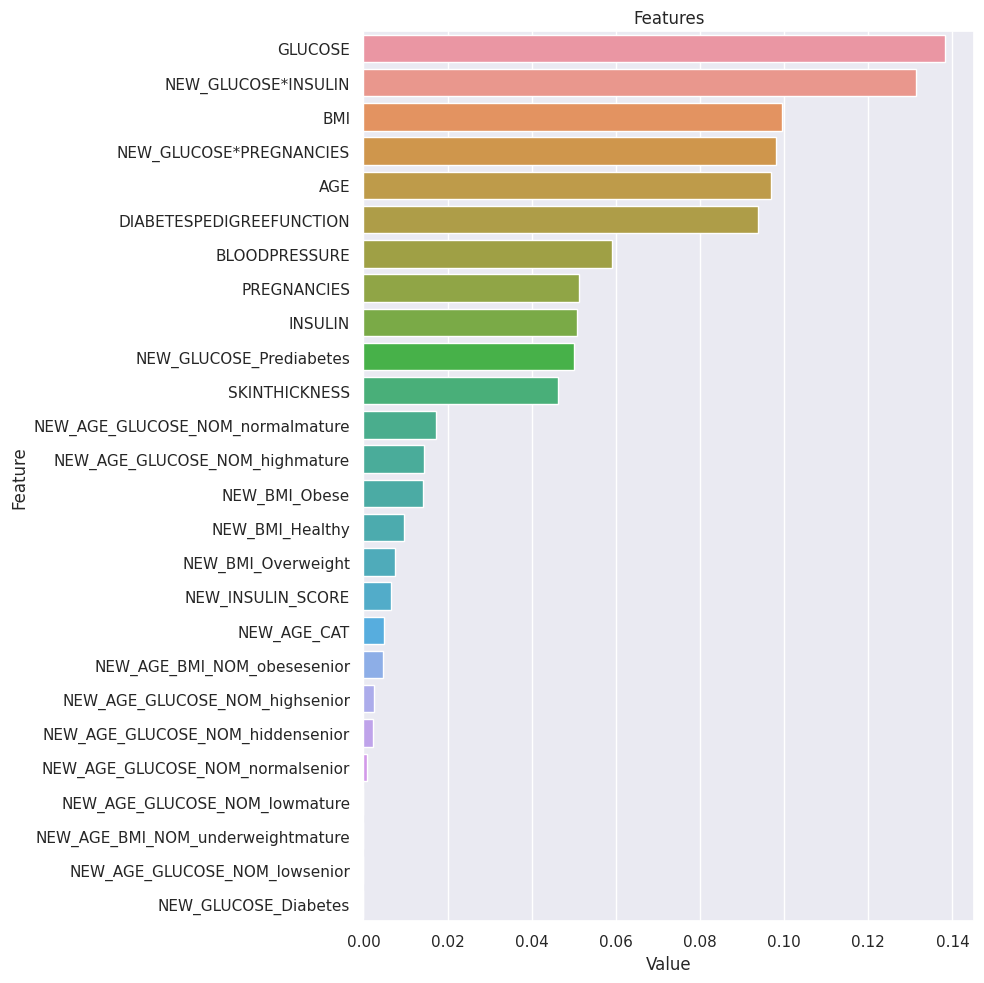

In [67]:
def plot_importance(model, features, num=len(X), save=False):
    # Create a DataFrame with feature importances and feature names
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    
    # Print the feature importance values in descending order
    print(feature_imp.sort_values("Value", ascending=False))
    
    # Set up the plot size and font scale for better readability
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    
    # Create a bar plot of feature importances, sorted in descending order
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    
    # Add a title and adjust the layout
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    
    # Optionally save the plot as an image
    if save:
        plt.savefig('importances.png')

# Call the function to plot feature importances for the trained Random Forest model
plot_importance(rf_model, X)